# Tugas 05 Instrumentasi Biomedika

Author: Azizah Syifalianti Noor (23817301)

Penjelasan Tugas:
Efek sampling dan kuantisasi dalam proses digitalisasi (diskritisasi). Dimana, efek sampling dan kuantisasi dipengaruhi oleh perubahan variable berikut:
- variabel time sampling (Ts) : mempengaruhi sampling
- variable jumlah selang (bit) : mempengaruhi kuantisasi


Analisis dilakukan terhadap SNR (signal to noise ratio), dipengaruhi dari berbagai kombinasi kedua parameter diatas.
- Signal = sinyal asli tanpa kuantisasi
- Noise = nilai eror sinyal setelah dilakukan kuantisasi

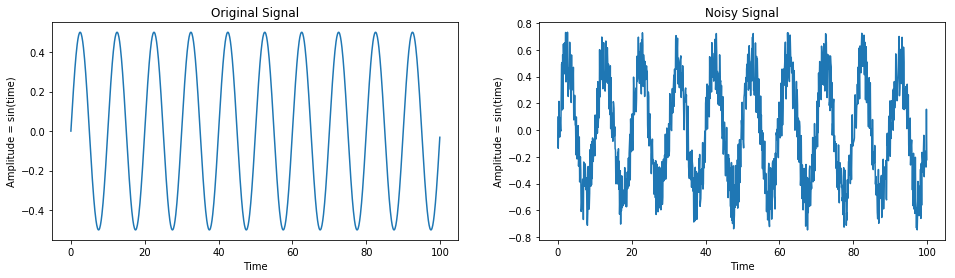

In [23]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Generate sine wave
def genSine(f0, fs, dur):
    t = np.arange(0,100,0.1)
    amp=0.5
    sinusoid = amp*np.sin(2*np.pi*t*(f0/fs))
    return t, sinusoid

#Generate noise
def genNoise(sinusoid, noise_amp=1):
    return sinusoid + (np.random.random(len(sinusoid))-0.5)*2*noise_amp

time, sinus = genSine(10,100,100)
sig_noise = genNoise(sinus, noise_amp=0.25)

# Plot Original Signal
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(time, sinus)
plt.title("Original Signal")
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')

# Plot Noisy Signal
plt.subplot(122)
plt.plot(time, sig_noise)
plt.title("Noisy Signal")
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')

# Display the sine wave
plt.show()

Prinsip dasar digitalisasi sinyal analog yaitu terdiri atas dua proses yaitu sampling (diskritisasi) dan kuantifikasi. Sebagaimana diilustrasikan seperti gambar berikut.

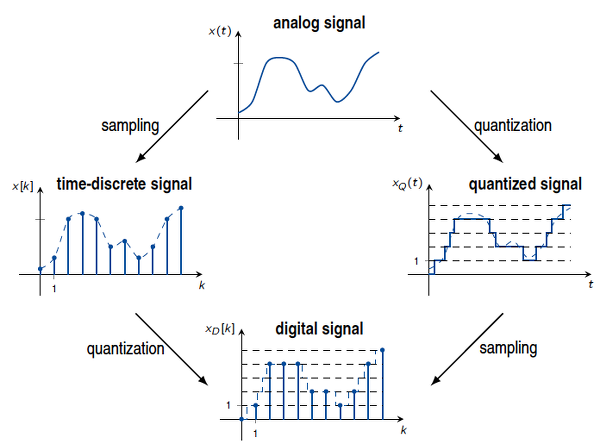


1. Sampling (diskritisasi)

Sampling adalah proses 

2. Kuantifikasi

Kuantifikasi adalah proses

# Evaluasi SNR pada Proses Kuantifikasi
Kuantifikasi dapat dievaluasi berdasarkan nilai signal-to-noise ratio (SNR), yang diperoleh dari nilai power sinyal yang tidak dikuantifikasi x[k] dibagi dengan nilai power dari eror kuantifikasi e[k]. Hal ini dapat diterapkan dengan asumsi bahwa sinyal berada dalam distribusi Gaussian yaitu memiliki nilai zero mean, zero variance dan merupakan sinyal stasioner. 

Nilai SNR dapat diketahui sebagaimana berikut:
SNR=10⋅log10(σ2/σ2e) in dB

dimana, σ2x dan σ2e adalah power dari sinyal x[k] dan e[k].

Pada proses kuantifikasi dilakukan sebagai mana diagram blok seperti ini.
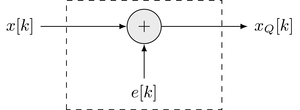

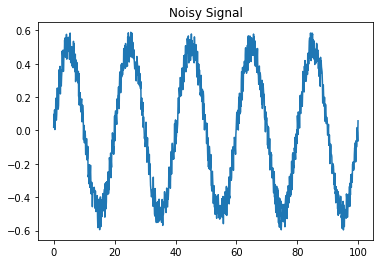

SNR = 41.626406 dB


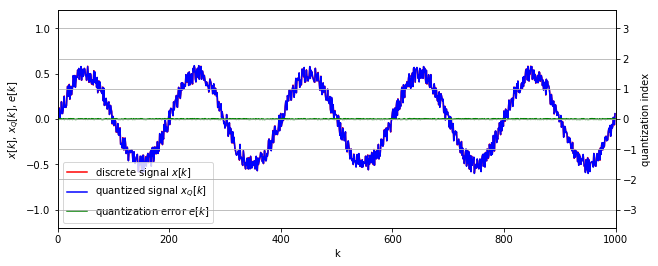

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Generate sine wave
def genSine(f0, fs, dur):
    t = np.arange(0,100,0.1)
    amp=0.5
    sinusoid = amp*np.sin(2*np.pi*t*(f0/fs))
    return t, sinusoid

#Generate noise
def genNoise(sinusoid, noise_amp=1):
    return sinusoid + (np.random.random(len(sinusoid))-0.5)*2*noise_amp

time, sinus = genSine(5,100,100)
sig_noise = genNoise(sinus, noise_amp=0.1)
N = len(sig_noise)  # length of signal

# generate signal
x = sig_noise

plt.plot(time, sig_noise)
plt.title("Noisy Signal")
plt.show()
# quantize signal
Q=100# or can be replaced with the length of signal to improve the accuracy of quantization [len(x)]
xi = np.round(Q * x)
xQ = 1/Q * xi   #quantized signal
e = xQ - x      #signal error

# plot (quantized) signals
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'discrete signal $x[k]$')
ax1.plot(xQ, 'b', label=r'quantized signal $x_Q[k]$')
ax1.plot(e, 'g', label=r'quantization error $e[k]$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$x[k]$, $x_Q[k]$, $e[k]$')
ax1.axis([0, N, -1.2, 1.2])
ax1.legend()

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel('quantization index')
ax2.grid()

# Calculate energy over each window [J]
sqx=np.square(x)
p = np.sum(sqx)
sqe=np.square(e)
pe = np.sum(sqe)

# Estimate SNR
SNR = 10*np.log10(p/pe)
print('SNR = %f dB' %SNR)


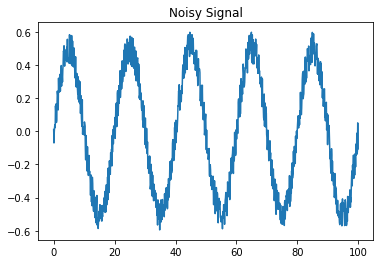

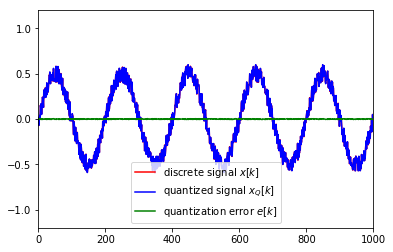

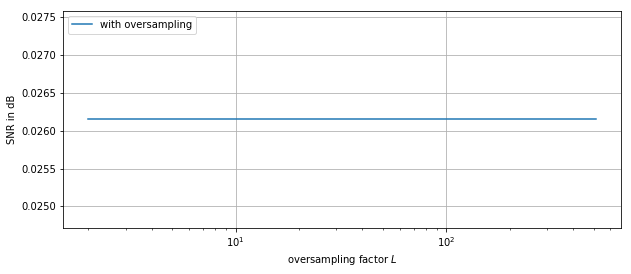

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Generate sine wave
def genSine(f0, fs, dur):
    t = np.arange(0,100,0.1)
    amp=0.5
    sinusoid = amp*np.sin(2*np.pi*t*(f0/fs))
    return t, sinusoid

#Generate noise
def genNoise(sinusoid, noise_amp=1):
    return sinusoid + (np.random.random(len(sinusoid))-0.5)*2*noise_amp

time, sinus = genSine(5,100,100)
sig_noise = genNoise(sinus, noise_amp=0.1)
N = len(sig_noise)  # length of signal

# generate signal
x = sig_noise

plt.plot(time, sig_noise)
plt.title("Noisy Signal")
plt.show()
# quantize signal
xi = np.round(100 * sig_noise)
xQ = 1/100 * xi   #quantized signal
e = xQ - sig_noise      #signal error


w = len(xQ)  # wordlength of the quantized signal
L = 2**np.arange(1,10)  # oversampling factors

N = len(x)  # length of signals
Om0 = 100*2*np.pi/N  # frequency of harmonic signal
Q = 1/(2**(w-1))  # quantization step


def SNR_oversampled_ADC(L):
    x = sig_noise
    xu = (1-Q)*sig_noise*np.arange(N*L)/L
    # quantize signal
    xQu = 1/L*xu
    # low-pass filtering and decimation
    xQ = sig.resample(xQu, N)
    # estimate SNR
    e = xQu - x

    return 20*np.log10((np.var(xQ)/np.var(e)))

# compute SNR for oversampled ADC
SNR = [SNR_oversampled_ADC(1) for l in L]

  
# plot result
plt.plot(x, 'r', label=r'discrete signal $x[k]$')
plt.plot(xQ, 'b', label=r'quantized signal $x_Q[k]$')
plt.plot(e, 'g', label=r'quantization error $e[k]$')
plt.axis([0, N, -1.2, 1.2])
plt.legend()

plt.figure(figsize=(10, 4))
plt.semilogx(L, SNR, label='with oversampling')
plt.xlabel(r'oversampling factor $L$')
plt.ylabel(r'SNR in dB')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [26]:
SNR

[0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963,
 0.026151325766209963]

Analisis:
1. Kuantifikasi akan mempengaruhi perubahan SNR karena nilai kuantifikasi yang digunakan akan mempengaruhi besaran amplitudo 
   sinyal yang akan didigitalisasi. SNR sebagai bentuk rasio antara energi sinyal dengan energi noise pada panjang data yang 
   sama, maka perubahan kuantifikasi akan mempengaruhi nilai energi sinyal yang dihasilkan. Oleh sebab itu, kuantifikasi akan 
   mempengaruhi nilai SNR.
2. Sampling tidak mempengaruhi perubahan SNR karena sampling hanya merubah pada berdasarkan parameter waktu. Semakin besar 
   sampling maka data yang diambil semakin banyak dan akurat.
   Namun, besaran nilai sinyal yang didiskritisasi tidak berubah dan tetap sesuai dengan sinyal analog asli.